Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df=pd.read_csv(r"F:\ugp\home_insurance_premiums.csv")

In [3]:
df 

,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
0,1,171958,5,1,4830,Low,0,Wood,1,4215,5961.39
1,2,721155,94,2,1868,Low,1,Wood,1,8825,3392.41
2,3,181932,94,2,3081,High,0,Brick,0,1390,6962.26
3,4,415838,57,1,4368,Medium,1,Concrete,0,4037,6509.29
4,5,309178,17,2,4037,Low,1,Wood,3,1232,6269.64
...,...,...,...,...,...,...,...,...,...,...,...
995,996,362066,91,3,2046,Low,0,Concrete,0,3205,2751.24
996,997,668362,64,3,4063,Medium,0,Wood,2,4955,9331.23
997,998,737409,17,3,2105,Low,1,Brick,1,7805,3018.38
998,999,611419,12,2,4252,Low,1,Concrete,1,1404,7101.16


Step 1 Read data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_id            1000 non-null   int64  
 1   home_value           1000 non-null   int64  
 2   home_age             1000 non-null   int64  
 3   num_floors           1000 non-null   int64  
 4   area_sqft            1000 non-null   int64  
 5   location_risk_zone   1000 non-null   object 
 6   has_security_system  1000 non-null   int64  
 7   construction_type    1000 non-null   object 
 8   prior_claims         1000 non-null   int64  
 9   deductible_amount    1000 non-null   int64  
 10  premium              1000 non-null   float64
dtypes: float64(1), int64(8), object(2)
memory usage: 86.1+ KB


In [6]:
df.shape

(1000, 11)

In [7]:
df.head()


,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
0,1,171958,5,1,4830,Low,0,Wood,1,4215,5961.39
1,2,721155,94,2,1868,Low,1,Wood,1,8825,3392.41
2,3,181932,94,2,3081,High,0,Brick,0,1390,6962.26
3,4,415838,57,1,4368,Medium,1,Concrete,0,4037,6509.29
4,5,309178,17,2,4037,Low,1,Wood,3,1232,6269.64


In [8]:
df.columns

Index(['policy_id', 'home_value', 'home_age', 'num_floors', 'area_sqft',
       'location_risk_zone', 'has_security_system', 'construction_type',
       'prior_claims', 'deductible_amount', 'premium'],
      dtype='object')

Step 2: Understand column types

Numeric variables (like home_value, area_sqft) affect premiums quantitatively.
Categorical variables (like construction_type, location_risk_zone) affect premiums qualitatively.

In [9]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['policy_id', 'home_value', 'home_age', 'num_floors', 'area_sqft', 'has_security_system', 'prior_claims', 'deductible_amount', 'premium']
Categorical columns: ['location_risk_zone', 'construction_type']


Step 4: Clean the data

In [11]:
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


In [13]:
df.isnull().sum().sort_values(ascending=True)

policy_id              0
home_value             0
home_age               0
num_floors             0
area_sqft              0
location_risk_zone     0
has_security_system    0
construction_type      0
prior_claims           0
deductible_amount      0
premium                0
dtype: int64

In [14]:
df["location_risk_zone"] = df["location_risk_zone"].str.strip().str.title()
df["construction_type"] = df["construction_type"].replace({
    "wood": "Wood", "WOOD": "Wood", "concrete": "Concrete"
})


Step 5: Understand distributions

In [15]:
print("\nSummary statistics for numeric columns:")
print(df[numeric_cols].describe())



Summary statistics for numeric columns:
         policy_id     home_value     home_age   num_floors    area_sqft  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000  505358.874000    49.899000     1.966000  2747.778000   
std     288.819436  274092.875806    29.017147     0.804669  1242.815311   
min       1.000000   50404.000000     1.000000     1.000000   506.000000   
25%     250.750000  257162.000000    25.000000     1.000000  1683.250000   
50%     500.500000  501142.000000    50.000000     2.000000  2723.000000   
75%     750.250000  742459.250000    74.000000     3.000000  3832.250000   
max    1000.000000  999597.000000    99.000000     3.000000  4999.000000   

       has_security_system  prior_claims  deductible_amount       premium  
count          1000.000000   1000.000000        1000.000000   1000.000000  
mean              0.564000      1.058000        5475.684000   5661.350740  
std               0.496135      1.014724      

In [16]:
print("\nSummary statistics for numeric columns:")
print(df[categorical_cols].describe())



Summary statistics for numeric columns:
       location_risk_zone construction_type
count                1000              1000
unique                  3                 3
top                   Low          Concrete
freq                  477               511


Distribution plots

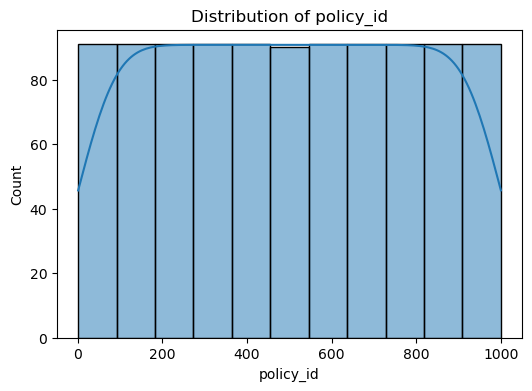

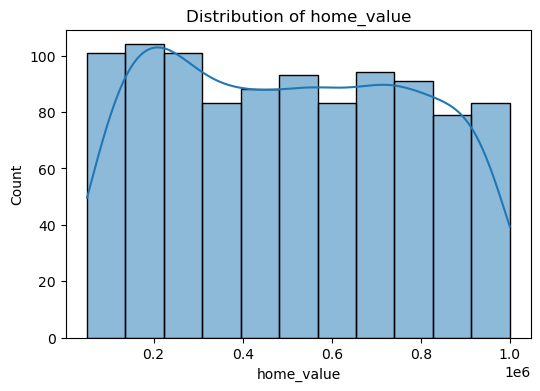

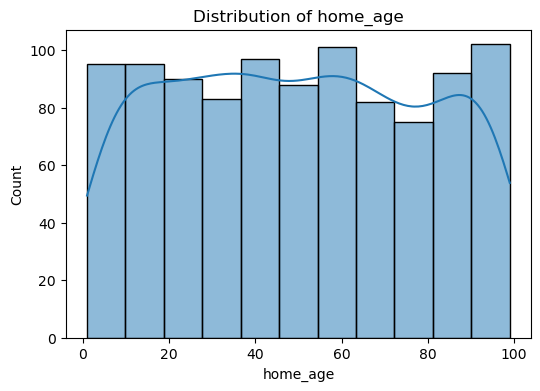

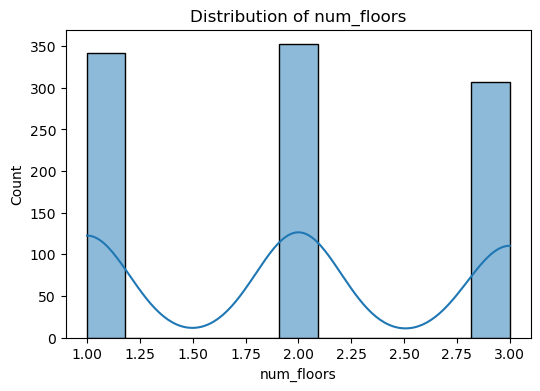

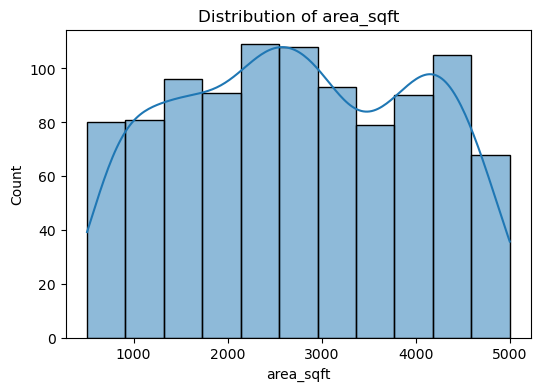

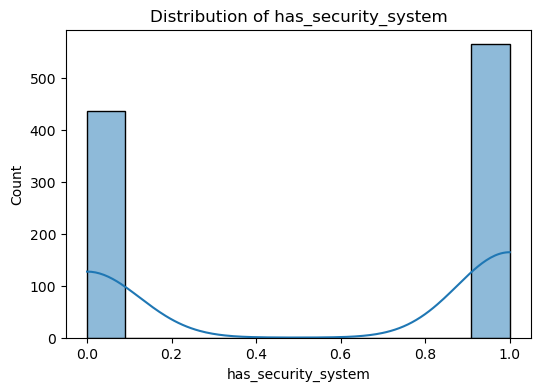

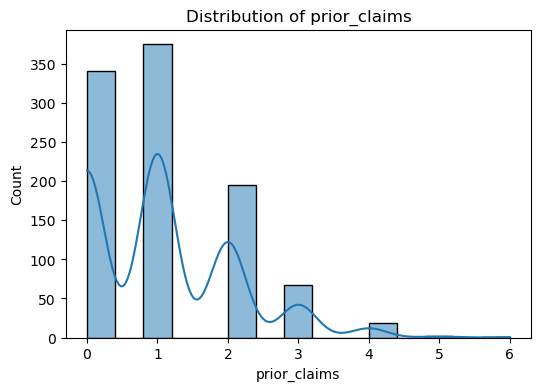

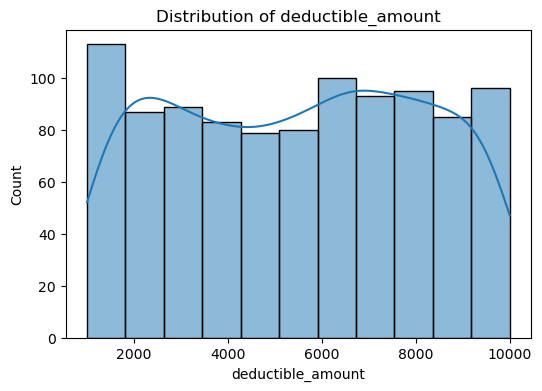

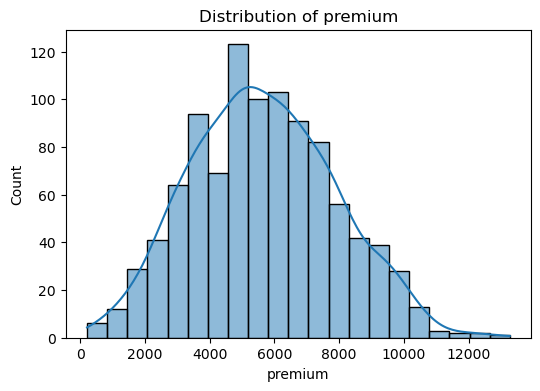

In [19]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Categorical value counts


location_risk_zone value counts:
location_risk_zone
Low       477
Medium    322
High      201
Name: count, dtype: int64


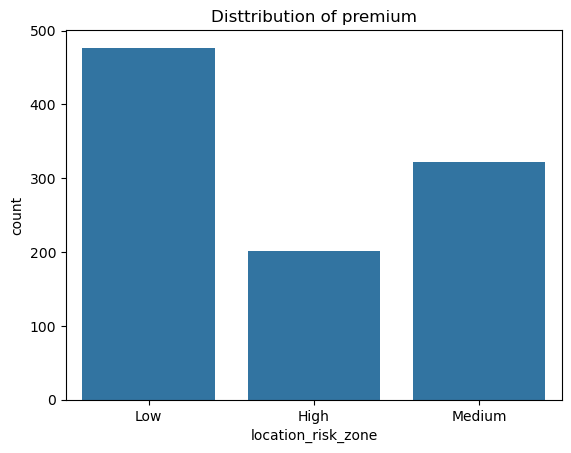


construction_type value counts:
construction_type
Concrete    511
Wood        295
Brick       194
Name: count, dtype: int64


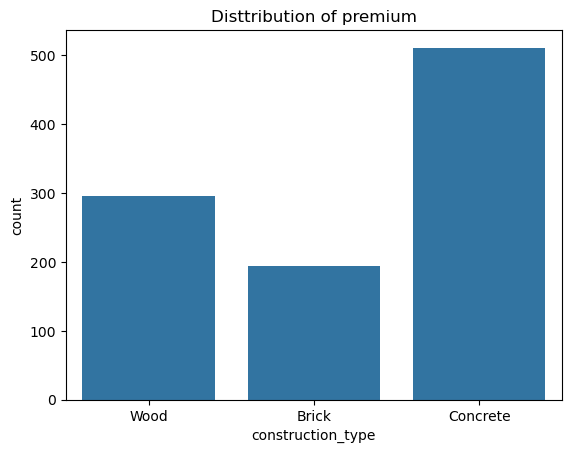

In [20]:
for cols in categorical_cols:
    print(f"\n{cols} value counts:")
    print(df[cols].value_counts())
    sns.countplot(data=df,x=cols)
    plt.title(f"Disttribution of {col}")
    plt.show()

Step 6: Assess performance per variable
how each variable affects premium the target:

Numeric features vs premium

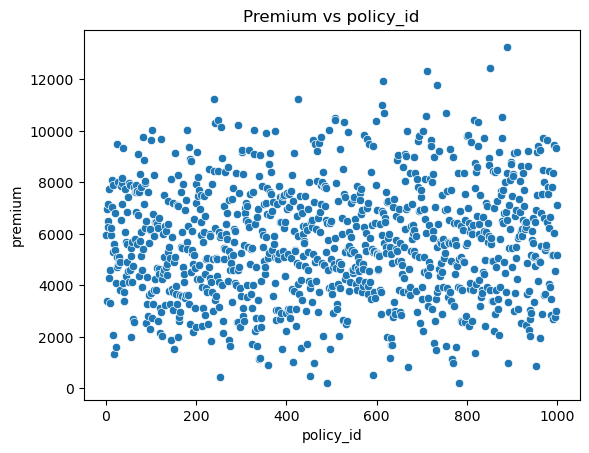

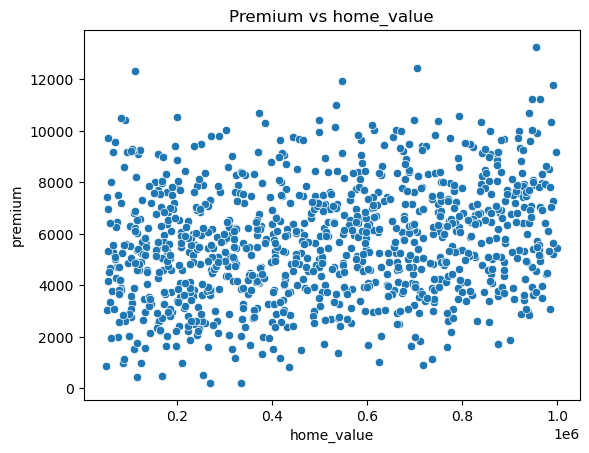

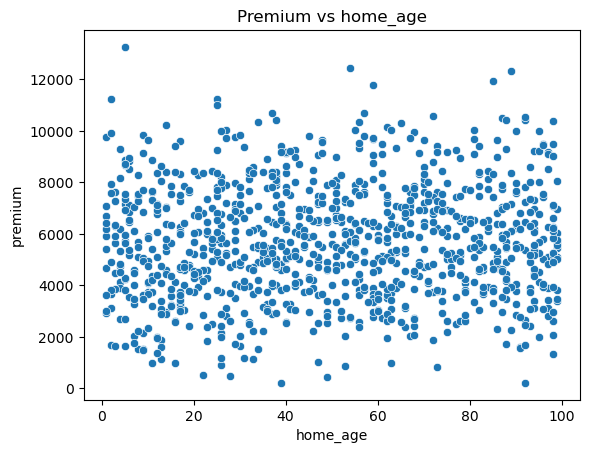

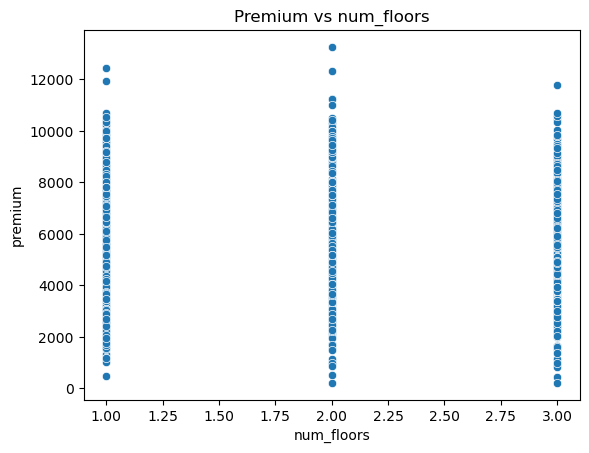

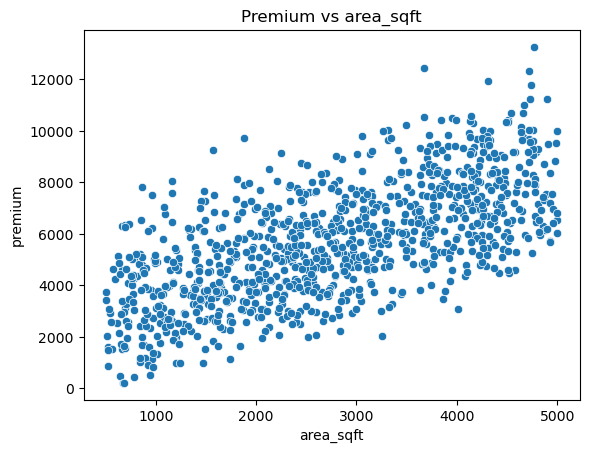

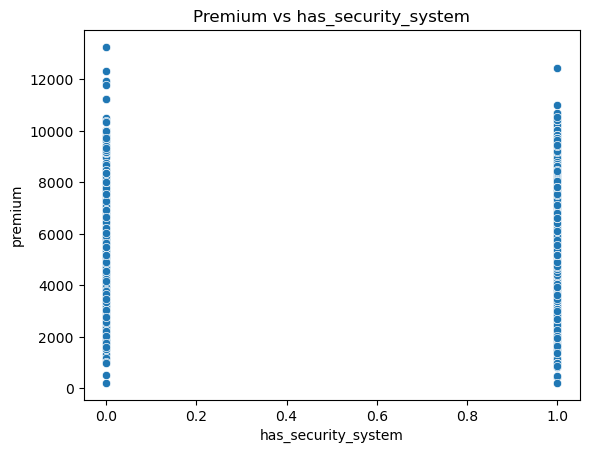

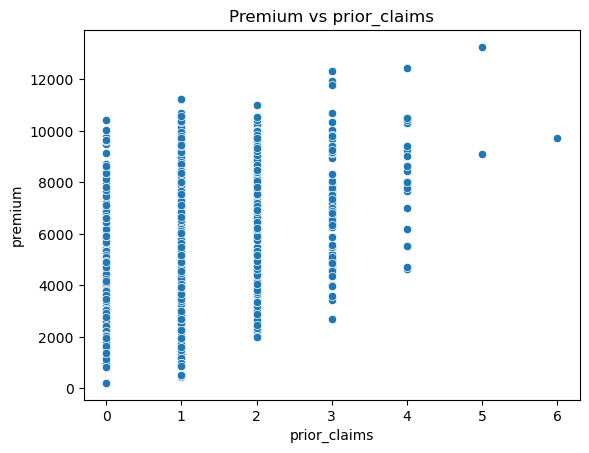

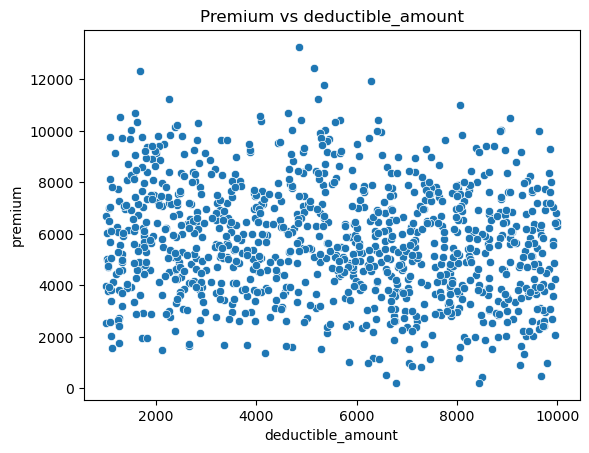

In [ ]:
# Which numeric features have strong linear/nonlinear relations with premium.
for col in numeric_cols:
    if col!="premium":
        sns.scatterplot(data=df,x=col,y="premium")
        plt.title(f"Premium vs {col}")
        plt.show()

Categorical feature vs premium

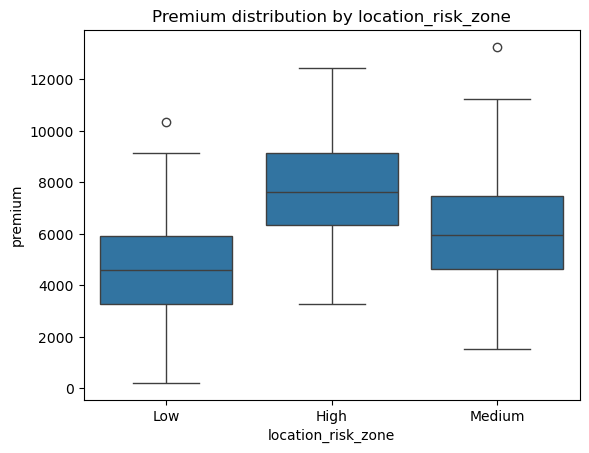

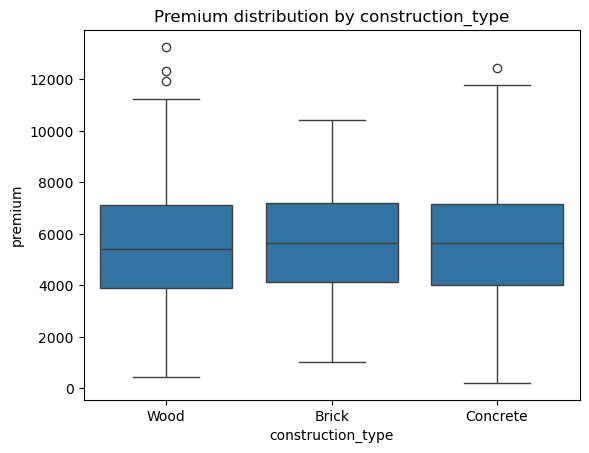

In [ ]:
#Which categories have noticeably higher average premiums
for col in categorical_cols:
    sns.boxplot(data=df,x=col,y='premium')
    plt.title(f"Premium distribution by {col}")
    plt.show()

Step 7: Quick correlation analysis

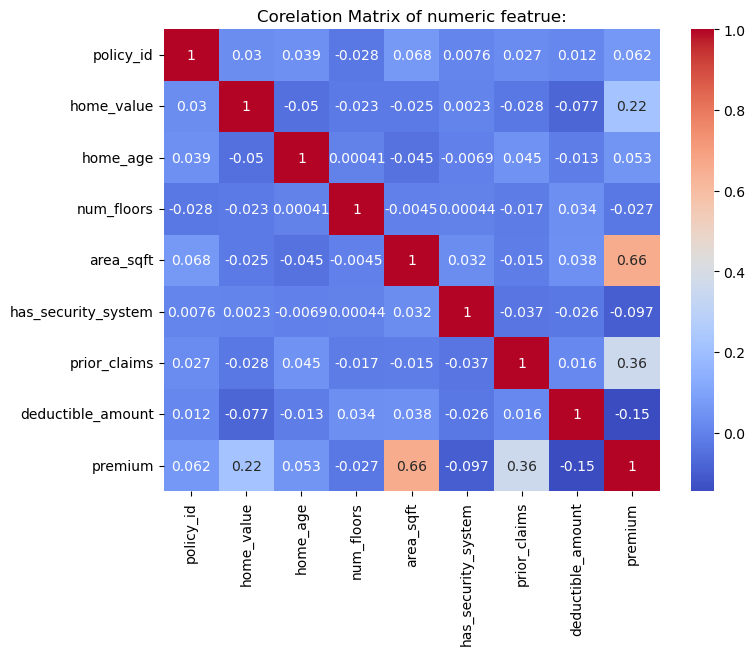

In [24]:
corr=df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Corelation Matrix of numeric featrue:")
plt.show()

Step 8 - Save clean Dataset

In [28]:
df.to_csv("home_insurance_clean.csv")
print("Clean dataset")

Clean dataset


Subset Of Data

In [29]:
df2=pd.read_csv(r"home_insurance_clean.csv")

In [30]:
df2

,Unnamed: 0,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
0,0,1,171958,5,1,4830,Low,0,Wood,1,4215,5961.39
1,1,2,721155,94,2,1868,Low,1,Wood,1,8825,3392.41
2,2,3,181932,94,2,3081,High,0,Brick,0,1390,6962.26
3,3,4,415838,57,1,4368,Medium,1,Concrete,0,4037,6509.29
4,4,5,309178,17,2,4037,Low,1,Wood,3,1232,6269.64
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,996,362066,91,3,2046,Low,0,Concrete,0,3205,2751.24
996,996,997,668362,64,3,4063,Medium,0,Wood,2,4955,9331.23
997,997,998,737409,17,3,2105,Low,1,Brick,1,7805,3018.38
998,998,999,611419,12,2,4252,Low,1,Concrete,1,1404,7101.16


In [31]:
df.shape

(1000, 11)

In [32]:
df.head()

,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
0,1,171958,5,1,4830,Low,0,Wood,1,4215,5961.39
1,2,721155,94,2,1868,Low,1,Wood,1,8825,3392.41
2,3,181932,94,2,3081,High,0,Brick,0,1390,6962.26
3,4,415838,57,1,4368,Medium,1,Concrete,0,4037,6509.29
4,5,309178,17,2,4037,Low,1,Wood,3,1232,6269.64


Select Specific column for numeric column

In [33]:
numeric_subset=df[['home_value','home_age','area_sqft','premium']]
numeric_subset

,home_value,home_age,area_sqft,premium
0,171958,5,4830,5961.39
1,721155,94,1868,3392.41
2,181932,94,3081,6962.26
3,415838,57,4368,6509.29
4,309178,17,4037,6269.64
...,...,...,...,...
995,362066,91,2046,2751.24
996,668362,64,4063,9331.23
997,737409,17,2105,3018.38
998,611419,12,4252,7101.16


Select Specific column for Categorical column

In [34]:
categorical_subset=df[['location_risk_zone','construction_type','has_security_system']]
categorical_subset

,location_risk_zone,construction_type,has_security_system
0,Low,Wood,0
1,Low,Wood,1
2,High,Brick,0
3,Medium,Concrete,1
4,Low,Wood,1
...,...,...,...
995,Low,Concrete,0
996,Medium,Wood,0
997,Low,Brick,1
998,Low,Concrete,1


Filter row base on condition

In [ ]:
# 1 home in high risk
high_risk=df[df['location_risk_zone']=="High"]
high_risk

,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
2,3,181932,94,2,3081,High,0,Brick,0,1390,6962.26
6,7,160268,23,3,782,High,1,Concrete,2,8634,4267.27
11,12,137498,75,1,960,High,1,Concrete,1,1745,6207.75
16,17,328167,38,1,1876,High,0,Brick,3,8025,7911.21
17,18,91090,50,3,3243,High,1,Concrete,0,8624,5602.79
...,...,...,...,...,...,...,...,...,...,...,...
970,971,758690,95,1,2552,High,0,Concrete,1,5543,8004.25
971,972,194528,98,2,2795,High,1,Wood,0,2811,6615.49
976,977,881538,70,2,4309,High,1,Concrete,0,7766,9650.07
988,989,188311,37,1,3999,High,1,Concrete,2,6633,7829.41


In [43]:
high_risk.head(5)

,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
2,3,181932,94,2,3081,High,0,Brick,0,1390,6962.26
6,7,160268,23,3,782,High,1,Concrete,2,8634,4267.27
11,12,137498,75,1,960,High,1,Concrete,1,1745,6207.75
16,17,328167,38,1,1876,High,0,Brick,3,8025,7911.21
17,18,91090,50,3,3243,High,1,Concrete,0,8624,5602.79


In [44]:
# homes with security system
home_security=df[df["has_security_system"] == 1]
home_security

,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
1,2,721155,94,2,1868,Low,1,Wood,1,8825,3392.41
3,4,415838,57,1,4368,Medium,1,Concrete,0,4037,6509.29
4,5,309178,17,2,4037,Low,1,Wood,3,1232,6269.64
5,6,694167,47,2,4808,Low,1,Brick,0,4131,7149.50
6,7,160268,23,3,782,High,1,Concrete,2,8634,4267.27
...,...,...,...,...,...,...,...,...,...,...,...
991,992,558153,68,1,1119,Low,1,Brick,1,3456,2693.21
993,994,636165,96,2,4323,High,1,Brick,1,5317,9465.39
997,998,737409,17,3,2105,Low,1,Brick,1,7805,3018.38
998,999,611419,12,2,4252,Low,1,Concrete,1,1404,7101.16


In [50]:
# Expensive homes 
luxury_homes=df[df["home_value"]>=500000]
luxury_homes

,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
1,2,721155,94,2,1868,Low,1,Wood,1,8825,3392.41
5,6,694167,47,2,4808,Low,1,Brick,0,4131,7149.50
7,8,782180,79,2,4178,Low,1,Wood,1,1233,7731.35
10,11,571430,66,3,4683,Low,1,Wood,1,8902,5958.05
12,13,949159,51,3,2825,Medium,1,Concrete,1,1427,8076.08
...,...,...,...,...,...,...,...,...,...,...,...
993,994,636165,96,2,4323,High,1,Brick,1,5317,9465.39
996,997,668362,64,3,4063,Medium,0,Wood,2,4955,9331.23
997,998,737409,17,3,2105,Low,1,Brick,1,7805,3018.38
998,999,611419,12,2,4252,Low,1,Concrete,1,1404,7101.16


In [52]:
# Medium risk and more than 2 prior claims
medium_high_claim=df[(df["location_risk_zone"]=="Medium") & (df["prior_claims"]>2)]
medium_high_claim

,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
102,103,614685,81,1,3310,Medium,0,Brick,3,1496,10030.06
113,114,398951,14,3,2233,Medium,1,Concrete,3,5761,6399.00
148,149,80535,67,2,2961,Medium,1,Wood,3,3409,7179.87
180,181,303618,55,2,4760,Medium,0,Wood,3,5374,10025.88
239,240,215838,84,1,3051,Medium,1,Brick,4,5181,8432.65
240,241,385674,65,2,4157,Medium,1,Concrete,4,2830,10296.57
257,258,790976,78,1,3700,Medium,1,Concrete,3,1793,8962.91
280,281,120467,83,3,2060,Medium,1,Concrete,3,8933,4601.98
282,283,672794,26,1,2743,Medium,0,Wood,3,7474,7778.21
363,364,551157,20,3,2467,Medium,0,Concrete,3,8953,6750.28


In [53]:
# Homes older than 50 years and without a security system
old_unsecured=df.query("home_age > 50 and has_security_system == 0")
old_unsecured

,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
2,3,181932,94,2,3081,High,0,Brick,0,1390,6962.26
8,9,104886,85,2,1986,Low,0,Brick,0,2391,3313.27
18,19,379365,98,1,1014,Low,0,Concrete,1,9326,1316.75
19,20,114820,82,2,1202,High,0,Concrete,2,6383,5382.96
21,22,371879,79,3,2566,Low,0,Concrete,1,3538,4098.62
...,...,...,...,...,...,...,...,...,...,...,...
985,986,142193,60,1,2257,Low,0,Wood,0,3552,3467.56
987,988,555950,94,2,3067,Low,0,Concrete,1,3808,5175.18
994,995,486341,68,2,2880,Low,0,Concrete,1,2556,4569.15
995,996,362066,91,3,2046,Low,0,Concrete,0,3205,2751.24


In [55]:
# Homes in High risk zone with premium > 10,000
high_ris=df.query("location_risk_zone == 'High' and premium > 10000")
high_ris

,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
238,239,964091,2,2,4902,High,0,Wood,1,5228,11252.65
248,249,89353,38,3,3839,High,0,Brick,4,5673,10415.46
254,255,532690,62,2,4635,High,1,Concrete,1,2377,10135.80
292,293,608986,14,1,3490,High,1,Wood,2,2421,10221.62
328,329,660269,27,1,4719,High,1,Concrete,2,8876,10016.66
493,494,947059,63,3,4260,High,1,Concrete,0,4708,10033.08
506,507,82097,87,2,3949,High,0,Concrete,4,9060,10518.52
508,509,699150,92,1,4506,High,1,Concrete,0,4880,10421.90
527,528,987012,34,3,4508,High,0,Wood,1,5570,10334.45
597,598,749438,98,1,4134,High,0,Wood,1,4093,10390.29


In [56]:
zone_summary=df.groupby("location_risk_zone")["premium"].describe()
zone_summary

,count,mean,std,min,25%,50%,75%,max
location_risk_zone,,,,,,,,
High,201.0,7688.267413,1827.048045,3274.79,6329.67,7634.55,9136.5900,12426.48
Low,477.0,4562.792600,1810.486837,212.14,3272.75,4600.42,5914.2700,10355.95
Medium,322.0,6023.468696,1972.029251,1529.26,4637.40,5944.65,7451.8075,13267.27


In [57]:
# Get specific rows and columns
sub1=df.loc[df['home_age']> 80 ,["policy_id","home_value","premium"]]
sub1

,policy_id,home_value,premium
1,2,721155,3392.41
2,3,181932,6962.26
8,9,104886,3313.27
15,16,241335,2075.35
18,19,379365,1316.75
...,...,...,...
982,983,349888,6234.34
987,988,555950,5175.18
989,990,960886,5192.99
993,994,636165,9465.39


In [59]:
#first 5 row first 4 column
sub2=df.iloc[:5,:4]
sub2

,policy_id,home_value,home_age,num_floors
0,1,171958,5,1
1,2,721155,94,2
2,3,181932,94,2
3,4,415838,57,1
4,5,309178,17,2


In [58]:
#top 10 most expensive premium
top_premium=df.nlargest(10,"premium")
top_premium

,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
889,890,955588,5,2,4766,Medium,0,Wood,5,4849,13267.27
851,852,703983,54,1,3671,High,1,Concrete,4,5155,12426.48
711,712,111476,89,2,4721,High,0,Wood,3,1675,12313.17
614,615,545972,85,1,4307,High,0,Wood,3,6289,11949.14
734,735,991970,59,3,4736,High,0,Concrete,3,5341,11793.85
238,239,964091,2,2,4902,High,0,Wood,1,5228,11252.65
424,425,946048,25,2,4727,Medium,0,Concrete,1,2257,11235.32
610,611,534963,25,2,4672,High,1,Wood,2,8063,10986.48
753,754,372710,37,3,4544,High,1,Concrete,3,1573,10706.16
616,617,940617,57,1,4663,High,1,Wood,1,4628,10687.28


In [60]:
#Bottom 10 lowest premiums

lowest_premiums=df.nsmallest(10,"premium")
lowest_premiums

,policy_id,home_value,home_age,num_floors,area_sqft,location_risk_zone,has_security_system,construction_type,prior_claims,deductible_amount,premium
489,490,269963,92,3,673,Low,0,Concrete,0,6775,212.14
782,783,333821,39,2,682,Low,1,Concrete,0,8444,219.69
252,253,115318,49,3,782,Low,1,Wood,1,8507,436.09
451,452,168015,28,1,641,Low,1,Wood,1,9676,462.10
592,593,253861,22,2,942,Low,0,Wood,1,6591,502.11
668,669,435777,73,3,975,Low,1,Concrete,0,7278,811.35
953,954,50404,53,2,525,Low,1,Concrete,1,7107,857.40
359,360,718234,26,3,923,Low,1,Wood,0,9245,921.26
890,891,210775,11,3,1239,Low,1,Wood,1,6228,970.31
461,462,86631,63,2,1203,Low,0,Concrete,0,7048,992.39


DATA VISUALIZATION

1.Segment customers clearly

2.Identify who pays higher premium willingly

3.Identify who creates payment risk

4.Translate insights into pricing & policy actions

CUSTOMER SEGMENTATION

In [4]:
#create premium segment
df['premium_segment']=pd.qcut(df["premium"],q=3,
                              labels=["Low Premium","Medium Premium","High Premium"]
                              )
# Create Risk Segment
df["risk_segment"]=np.where(df["prior_claims"]>2,
                            "High Risk","Low Risk")

df[["premium_segment","risk_segment"]].value_counts()

premium_segment  risk_segment
Low Premium      Low Risk        325
Medium Premium   Low Risk        308
High Premium     Low Risk        278
                 High Risk        55
Medium Premium   High Risk        25
Low Premium      High Risk         9
Name: count, dtype: int64

High Premium Customers Profile

This charts shows how premium levels vary across different location risk zones using customer counts

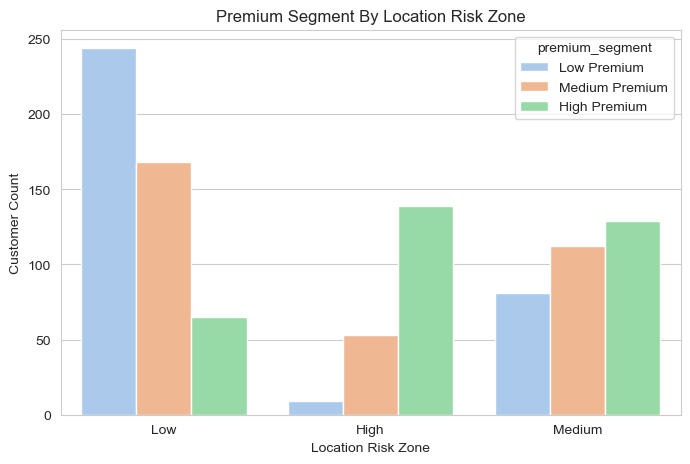

In [6]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(8,5))
sns.countplot(data=df,x="location_risk_zone",hue="premium_segment")
plt.title("Premium Segment By Location Risk Zone")
plt.xlabel("Location Risk Zone")
plt.ylabel("Customer Count")
plt.show()

WHO ARE WE HAVING PAYMENT DIFFICULTIES WITH

This countplot compares customer payment  risk across premium segments.The increasing presence of high-risk customers in higher premium tiers indicate that risk-based pricing is beging applied correctly

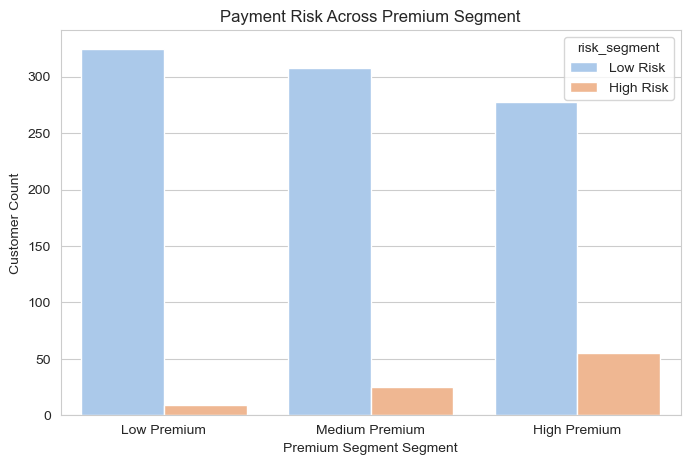

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x="premium_segment",hue='risk_segment')
plt.title("Payment Risk Across Premium Segment")
plt.xlabel("Premium Segment Segment")
plt.ylabel("Customer Count")
plt.show()


HOUSE CHARACTERISTICS THAT DRIVE PREMIUM UP (CONFIRMATION)

Homes associated with High-Risk customers show a wider and higher premium distribution, driven by claim history and location exposure.

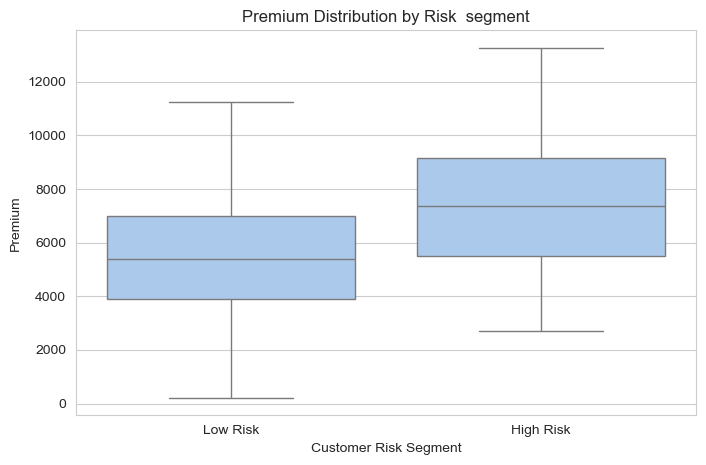

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="risk_segment",y="premium")
plt.title("Premium Distribution by Risk  segment")
plt.xlabel("Customer Risk Segment")
plt.ylabel("Premium")
plt.show()

SECURITY SYSTEM – A BUSINESS LEVER

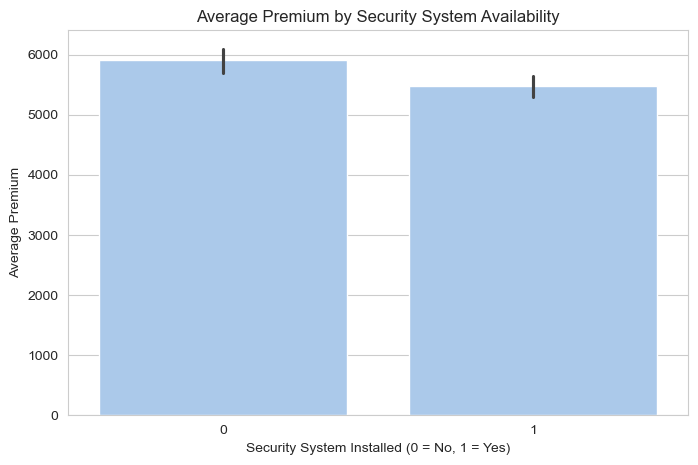

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="has_security_system",
    y="premium",
    estimator=np.mean
)
plt.title("Average Premium by Security System Availability")
plt.xlabel("Security System Installed (0 = No, 1 = Yes)")
plt.ylabel("Average Premium")
plt.show()
